In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
looks = np.random.rand(100)*10
kindness = np.random.rand(100)*10
taken = np.zeros(100, dtype=int)
cols = zip(looks, kindness, taken)

men_df = pd.DataFrame(cols, columns=["looks", "kindness", "taken"])

In [3]:
men_df

,looks,kindness,taken
0,2.320308,3.476310,0
1,1.456556,3.428780,0
2,9.999767,3.129787,0
3,5.984997,0.418188,0
4,0.637865,8.064022,0
...,...,...,...
95,3.280628,8.020984,0
96,8.963349,6.470435,0
97,8.900254,4.653024,0
98,7.508588,1.337705,0


In [4]:
men_df.loc[(men_df['looks'] >=5) & (men_df['kindness'] >=5), 'taken'] = "taken"
men_df.loc[men_df['taken']!="taken", 'taken'] = "available"

In [5]:
available_men_df = men_df[(men_df["taken"]=="available")]

In [6]:
men_df

,looks,kindness,taken
0,2.320308,3.476310,available
1,1.456556,3.428780,available
2,9.999767,3.129787,available
3,5.984997,0.418188,available
4,0.637865,8.064022,available
...,...,...,...
95,3.280628,8.020984,available
96,8.963349,6.470435,taken
97,8.900254,4.653024,available
98,7.508588,1.337705,available


In [7]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

In [8]:
rho = round(np.corrcoef(looks, kindness)[0, 1], 3)
rho_subset = round(np.corrcoef(available_men_df['looks'], available_men_df['kindness'])[0,1], 3)

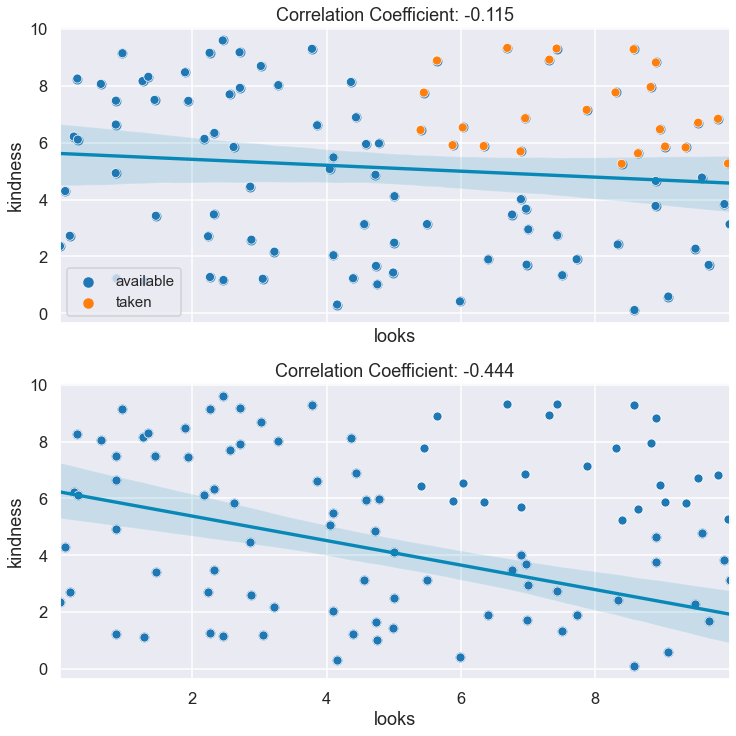

In [12]:
sns.set_style("darkgrid")
sns.set_context('talk')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12), sharex=True)


# hue_regplot(data=men_df, x="looks", y="kindness",hue='taken')
sns.regplot(x="looks", y="kindness", data=men_df, ax=ax1, line_kws={"color": "#0888b7"})
sns.scatterplot(x="looks", y="kindness", data=men_df, ax=ax1, hue='taken')
ax1.legend(loc='lower left',fontsize = 15)
ax1.set_title(f'Correlation Coefficient: {rho}')

sns.regplot(x="looks", y="kindness", data=available_men_df, ax=ax2, line_kws={"color": "#0888b7"})
sns.scatterplot(x="looks", y="kindness", data=men_df, ax=ax2)
ax2.set_title(f'Correlation Coefficient: {rho_subset}')

plt.savefig('induced-correlation.png')
plt.show()
